In [1]:
#导入常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import missingno as msno
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# #批量读取
# # 指定包含 CSV 文件的文件夹路径
# folder_path = './dataset02'

# # 获取文件夹中所有的文件名
# file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# # 初始化一个空的 DataFrame 用于存储所有 CSV 文件的数据
# combined_df = pd.DataFrame()

# # 循环读取每个 CSV 文件并将其合并到 combined_df 中
# for file_name in file_names:
#     # 构建完整的文件路径
#     file_path = os.path.join(folder_path, file_name)
    
#     # 读取 CSV 文件并转换为 DataFrame
#     df = pd.read_csv(file_path)
    
#     # 将当前 CSV 文件的数据追加到 combined_df
#     combined_df = combined_df.append(df, ignore_index=True)

# # 打印合并后的 DataFrame
# print(combined_df)


In [3]:
# # 设置要读取的 CSV 文件夹路径
# csv_folder_path ='./dataset02'

# # 获取文件夹下所有文件名
# file_names = os.listdir(csv_folder_path)

# # 初始化一个空的 DataFrame 列表
# df_list = []

# # 遍历文件名列表，读取所有 CSV 文件并存储到 DataFrame 列表中
# for file_name in file_names:
#     if file_name.endswith('.csv'):  # 确保只处理 CSV 文件
#         file_path = os.path.join(csv_folder_path, file_name)
#         df = pd.read_csv(file_path)
#         df_list.append(df)

# # 合并所有 DataFrame 到一个大的 DataFrame
# combined_df = pd.concat(df_list, ignore_index=True)

# # 按日期（假设日期列名为 'Date'）进行分组，并计算各列的平均值
# average_by_date = combined_df.groupby('Date').mean()

# # 打印平均值数据的前几行，检查结果
# print("Average data by date:")
# print(average_by_date.head())

# # 在这里可以对 average_by_date 进行进一步的数据分析和可视化
# # 例如，绘制平均 Discharge 值随时间变化的折线
# sns.set(style="whitegrid")  # 设置 seaborn 样式

# # 假设 'Discharge' 列为要分析的字段
# plt.figure(figsize=(12, 6))
# sns.lineplot(x=average_by_date.index, y='Discharge', data=average_by_date)
# plt.title('Average Discharge Over Time')
# plt.xlabel('Date')
# plt.ylabel('Average Discharge')
# plt.xticks(rotation=45)  # 旋转 x 轴标签，使日期更易读
# plt.show()


In [4]:
# # 设置导出的文件路径和文件名
# output_csv_path = './dataaverage.csv'

# # 导出 DataFrame 到 CSV 文件
# average_by_date.to_csv(output_csv_path, index=False)  # 设置 index=False 避免写入行索引

In [5]:
#train = pd.read_csv('./01333000.csv')
train=pd.read_csv('./dataaverage.csv')

In [6]:
train.head()
train.tail()
train.columns
#['Date', 'Discharge'径流量, 'Dayl'日照时数, 'Prcp'降水量, 
#'Srad'日射量, 'Swe'积雪深度, 'Tmax'最高气温, 'Tmin','Vp'水汽压]

Index(['Discharge', 'Dayl', 'Prcp', 'Srad', 'Tmax', 'Tmin', 'Vp'], dtype='object')

In [7]:
train.shape
train.info

<bound method DataFrame.info of        Discharge         Dayl      Prcp        Srad       Tmax       Tmin  \
0      94.874667  33165.59080  0.000000  255.161733   8.326133  -5.131600   
1      91.706667  33212.12853  0.532400  257.040267  11.836400  -2.343200   
2      97.673333  33268.08907  0.813867  214.928267  15.763733   4.636533   
3     149.294667  33318.85213  5.027467  162.055733  16.146933   7.323467   
4     179.577333  33351.46640  7.261333  220.734000  14.474133  -3.579600   
...          ...          ...       ...         ...        ...        ...   
1822  266.877333  33020.47000  1.091467  182.626533  -2.617067 -10.678000   
1823  227.533333  33046.21373  0.000000  222.196667  -3.550133 -13.504933   
1824  222.488000  33090.88867  0.106667  259.466267   3.573200 -10.476667   
1825  203.442667  33129.20400  0.015467  168.288667   6.159467  -1.702267   
1826  190.549333  33110.04627  0.061067  213.877467   4.866533  -6.089600   

               Vp  
0      421.210400  
1  

In [8]:
train.describe()

,Discharge,Dayl,Prcp,Srad,Tmax,Tmin,Vp
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,208.979063,43189.106511,3.490353,322.658972,15.526244,4.097481,983.886444
std,222.394521,7107.476967,5.591134,105.342599,9.916206,9.189348,563.588179
min,8.585467,32967.655730,0.000000,76.345867,-9.538267,-19.083200,139.563600
25%,75.458400,36234.507330,0.058733,238.975933,7.305800,-2.811800,503.882067
50%,143.315067,43200.000130,1.045467,320.115200,16.785600,4.108400,835.455200
75%,266.846000,50136.672670,4.720533,407.813067,24.279600,12.214400,1447.141200
max,3589.406667,53432.344130,71.531333,574.893467,33.239867,20.564667,2424.271333


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Discharge,1827.0,208.979063,222.394521,8.585467,75.458400,143.315067,266.846000,3589.406667
Dayl,1827.0,43189.106511,7107.476967,32967.655730,36234.507330,43200.000130,50136.672670,53432.344130
Prcp,1827.0,3.490353,5.591134,0.000000,0.058733,1.045467,4.720533,71.531333
Srad,1827.0,322.658972,105.342599,76.345867,238.975933,320.115200,407.813067,574.893467
Tmax,1827.0,15.526244,9.916206,-9.538267,7.305800,16.785600,24.279600,33.239867
Tmin,1827.0,4.097481,9.189348,-19.083200,-2.811800,4.108400,12.214400,20.564667
Vp,1827.0,983.886444,563.588179,139.563600,503.882067,835.455200,1447.141200,2424.271333


In [10]:
#train.describe(include=['O'])

ValueError: No objects to concatenate

In [ ]:
#删除无用特征
#train.drop(['User_ID'],axis=1,inplace=True)
# 查看某一列取值的唯一值，Age、City_Category为列名

# train.Age.unique()
# array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],      dtype=object)

# train.City_Category.unique()
# array(['A', 'C', 'B'], dtype=object)

# #例如将Gender列原取值F映射为0，M映射为1
# train['Gender']=train['Gender'].map({'F':0, 'M':1})
# #将Age取值映射到1-7。
# train['Age']=train['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })

In [11]:
#获取每一列中数据为空的数量
train.isnull().sum()
#统计某一列不同的取值的数量，Product_Category为列名，返回值第一列为取值情况，第二列为该值的数量
#train.Product_Category.value_counts()  

#直接删除空值行
#train.dropna(inplace=True)
#使众数填充空值
#train['cat2'] = train['cat2'].fillna(df['cat2'].mode()[0], inplace = True)
#使用均值填充空值
#train['Purchase'] = train['Purchase'].fillna(df['Purchase'].mean(), inplace = True)
#使用中位数填充空值
#diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)

Discharge    0
Dayl         0
Prcp         0
Srad         0
Tmax         0
Tmin         0
Vp           0
dtype: int64

In [ ]:
#改变某一列的数据类型（只能向下转换）
#train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].astype(int)

#使用某一列或几列为唯一标识，删除重复数据，保留唯一值。
#inplace=True表示直接在原数据上进行操作，否则返回一个新DataFrame
#data.drop_duplicates(['Age'],'first',inplace=True)

array([[<AxesSubplot:title={'center':'Discharge'}>,
        <AxesSubplot:title={'center':'Dayl'}>,
        <AxesSubplot:title={'center':'Prcp'}>],
       [<AxesSubplot:title={'center':'Srad'}>,
        <AxesSubplot:title={'center':'Tmax'}>,
        <AxesSubplot:title={'center':'Tmin'}>],
       [<AxesSubplot:title={'center':'Vp'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

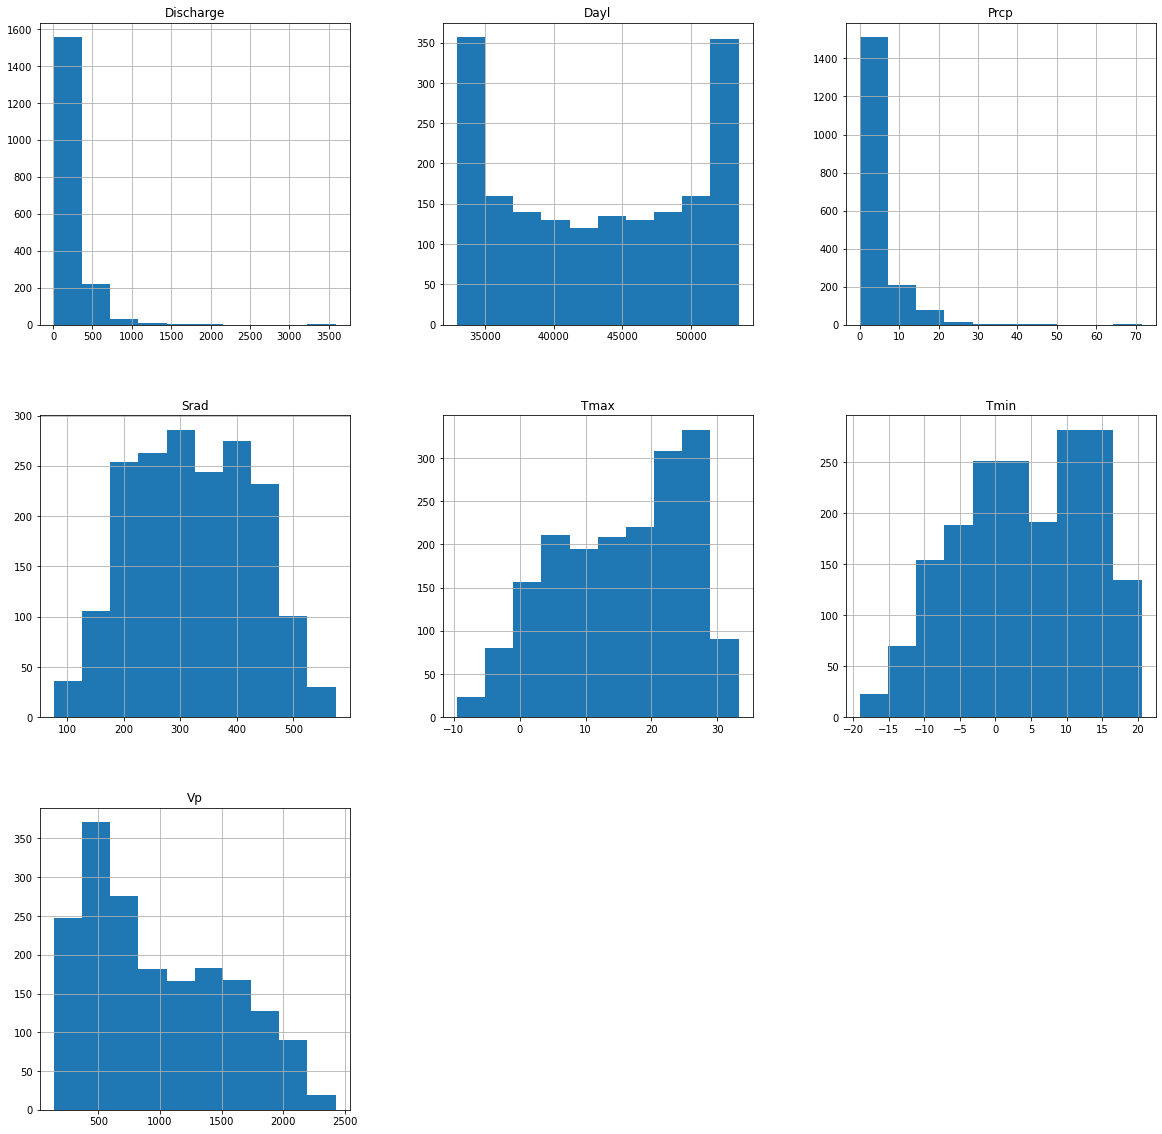

In [12]:
train.hist(figsize = (20,20))

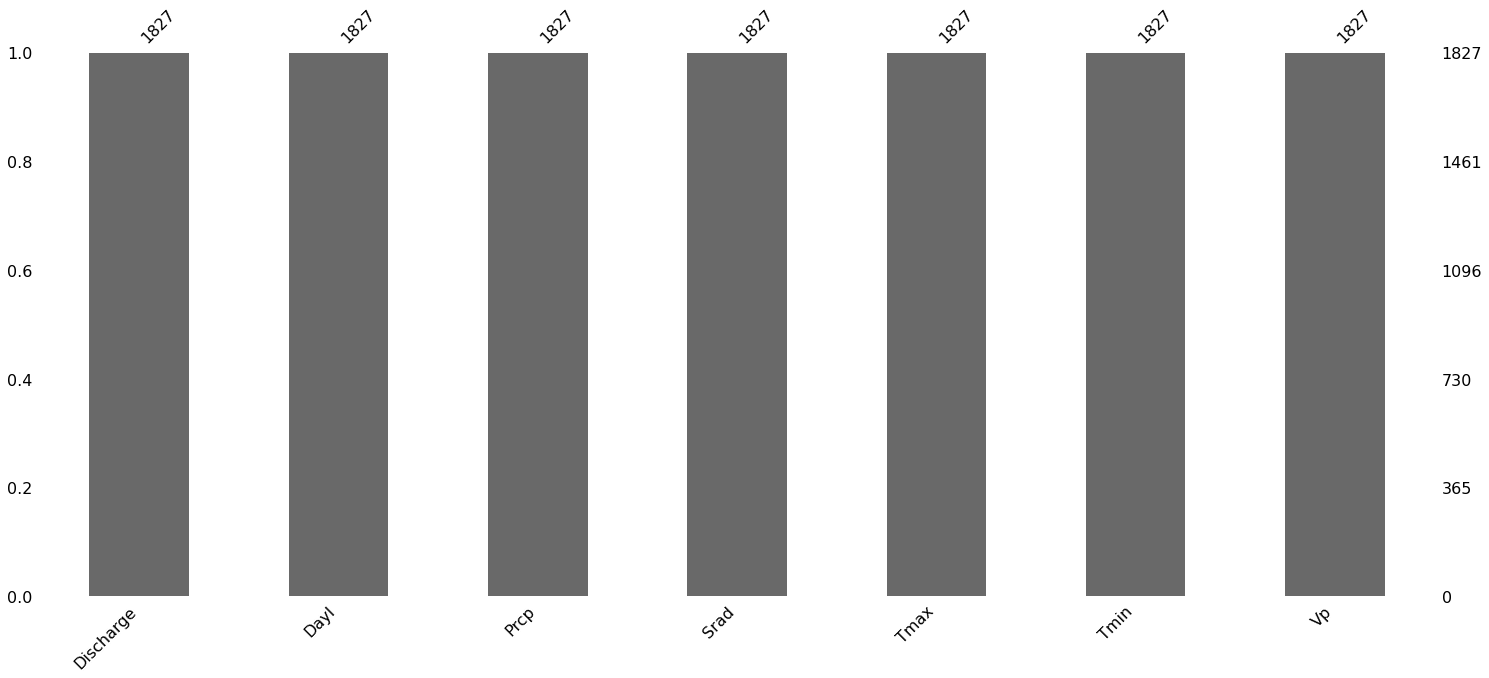

In [13]:
p=msno.bar(train)#数据分布情况

In [ ]:
#查看某一特征中数据取值的分布情况，下例中Outcome为列名
#data.Outcome.value_counts().plot(kind="bar")

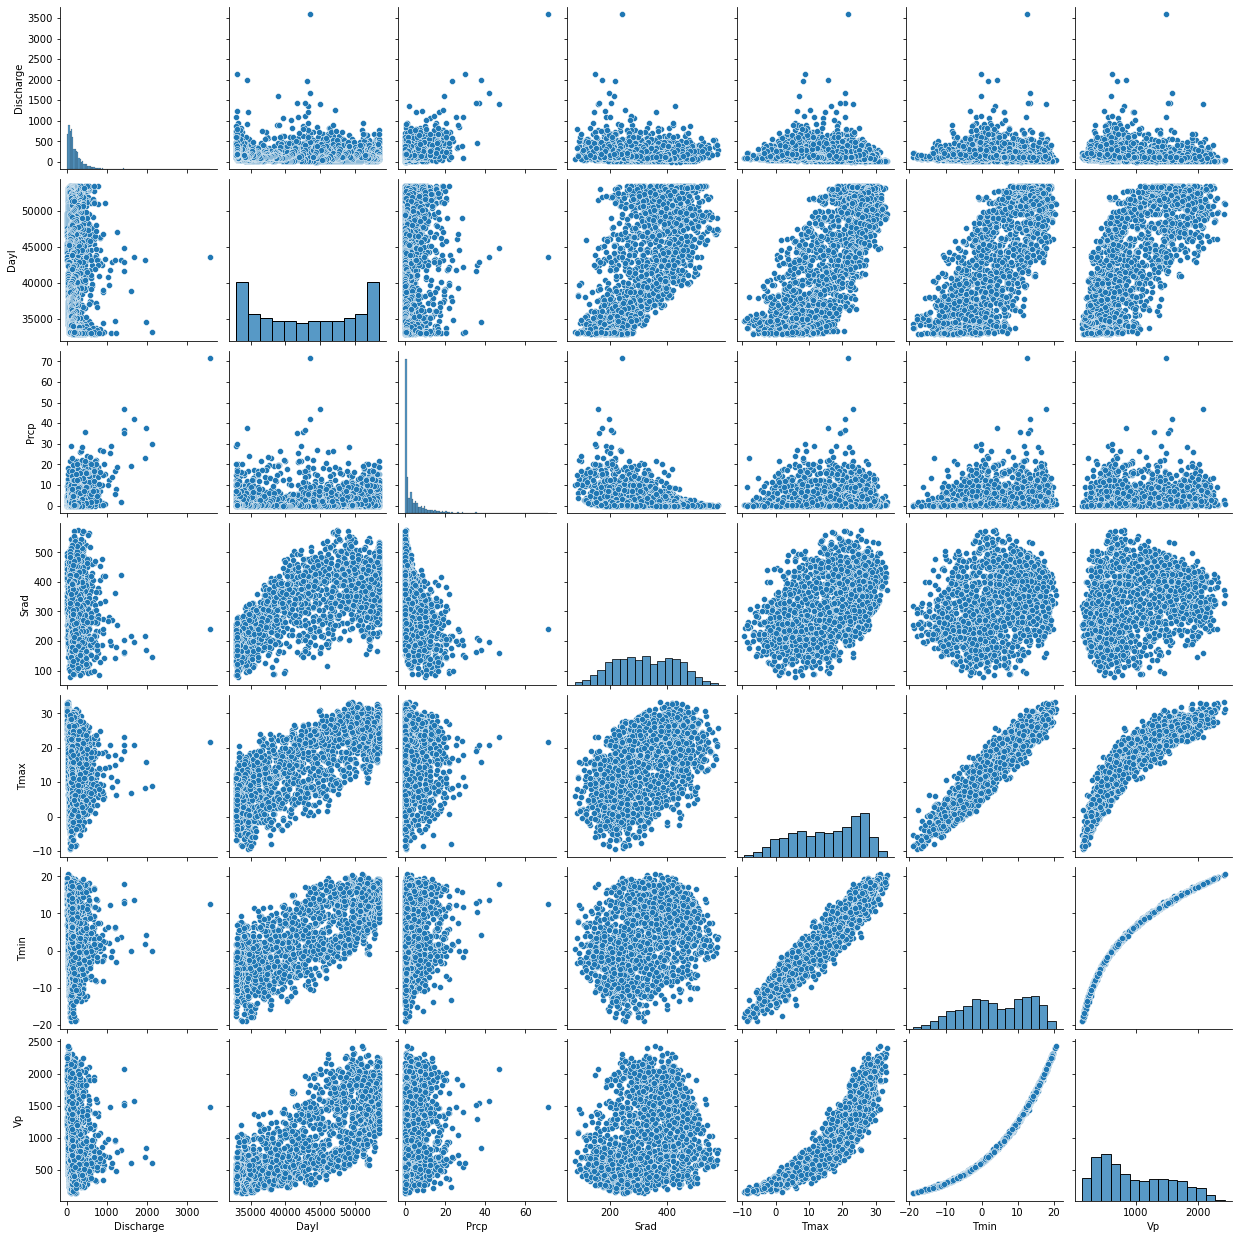

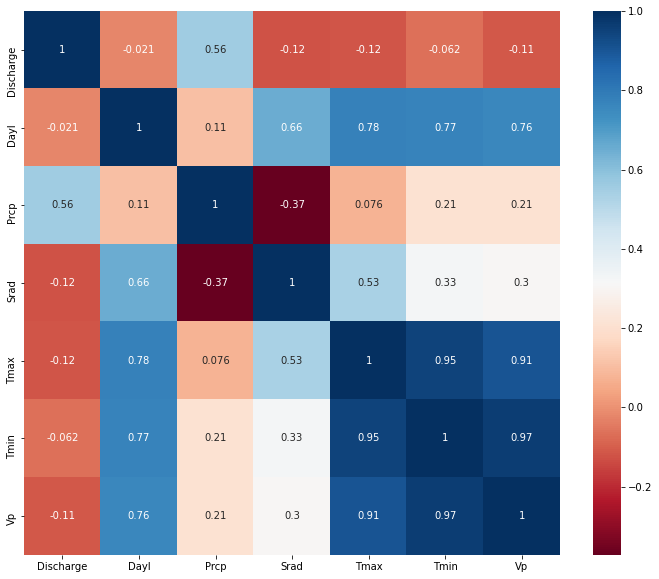

In [14]:
#绘制两个变量间的散点图
# figure size
#plt.figure(figsize=(15,8))
# Simple scatterplot
#ax = sns.scatterplot(x='Calories', y='LightActiveDistance', data=activity1)
#ax.set_title('Scatterplot of calories and intense_activities')

#绘制折线图，查看变量变化趋势

## plot the raw values 
# col_select = ['Calories','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
# show_dt = data[col_select]
# # figure size
# plt.figure(figsize=(15,8))
# # timeseries plot using lineplot
# ax = sns.lineplot(data=show_dt)
# ax.set_title('Un-normalized value of calories and different activities based on activity m

#查看两两数据之间的相关性，对角线上由于是数据自身，所以以直方图呈现，其他的以两两数据之间的散点图呈现。
sns.pairplot(train)

#按照某一特定列进行分类后查看数据的分布情况

#Outcome取值为0,1，可以按照该字段对数据进行分类后呈现数据的分布情况，黄色点表示Outcome为1的数据，蓝色点表示Outcome为0的数据。
#hue ：针对某一字段进行分类 
#sns.pairplot(data, hue = 'Outcome')

#利用热力图查看数据之间的相关系数
plt.figure(figsize=(12,10))  
p=sns.heatmap(train.corr(), annot=True,cmap ='RdBu') 

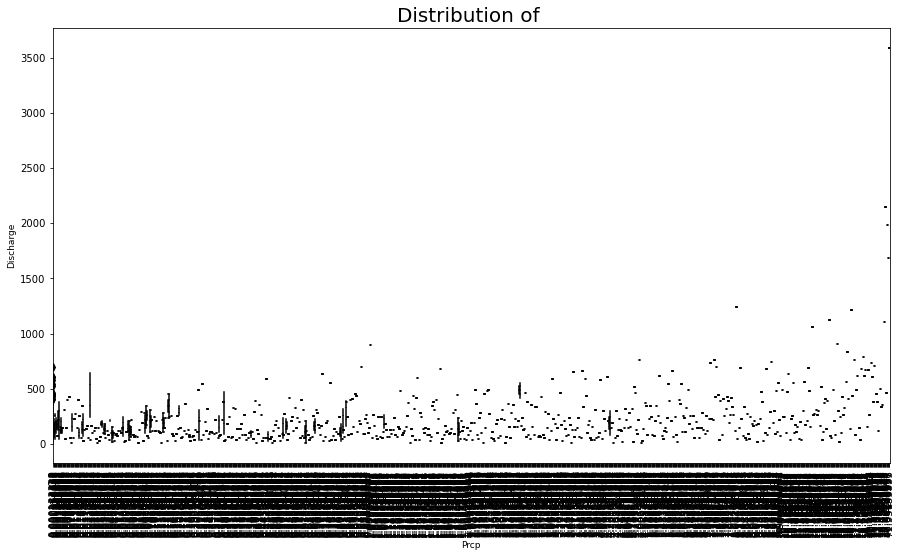

In [15]:
#绘制数据的箱线图，查看数据分布情况、离散情况及是否存在异常值等
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = train['Prcp'], y = train['Discharge'], palette = 'inferno') 
ax.set_xlabel(xlabel = 'Prcp', fontsize = 9)
ax.set_ylabel(ylabel = 'Discharge', fontsize = 9)
ax.set_title(label = 'Distribution of ', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


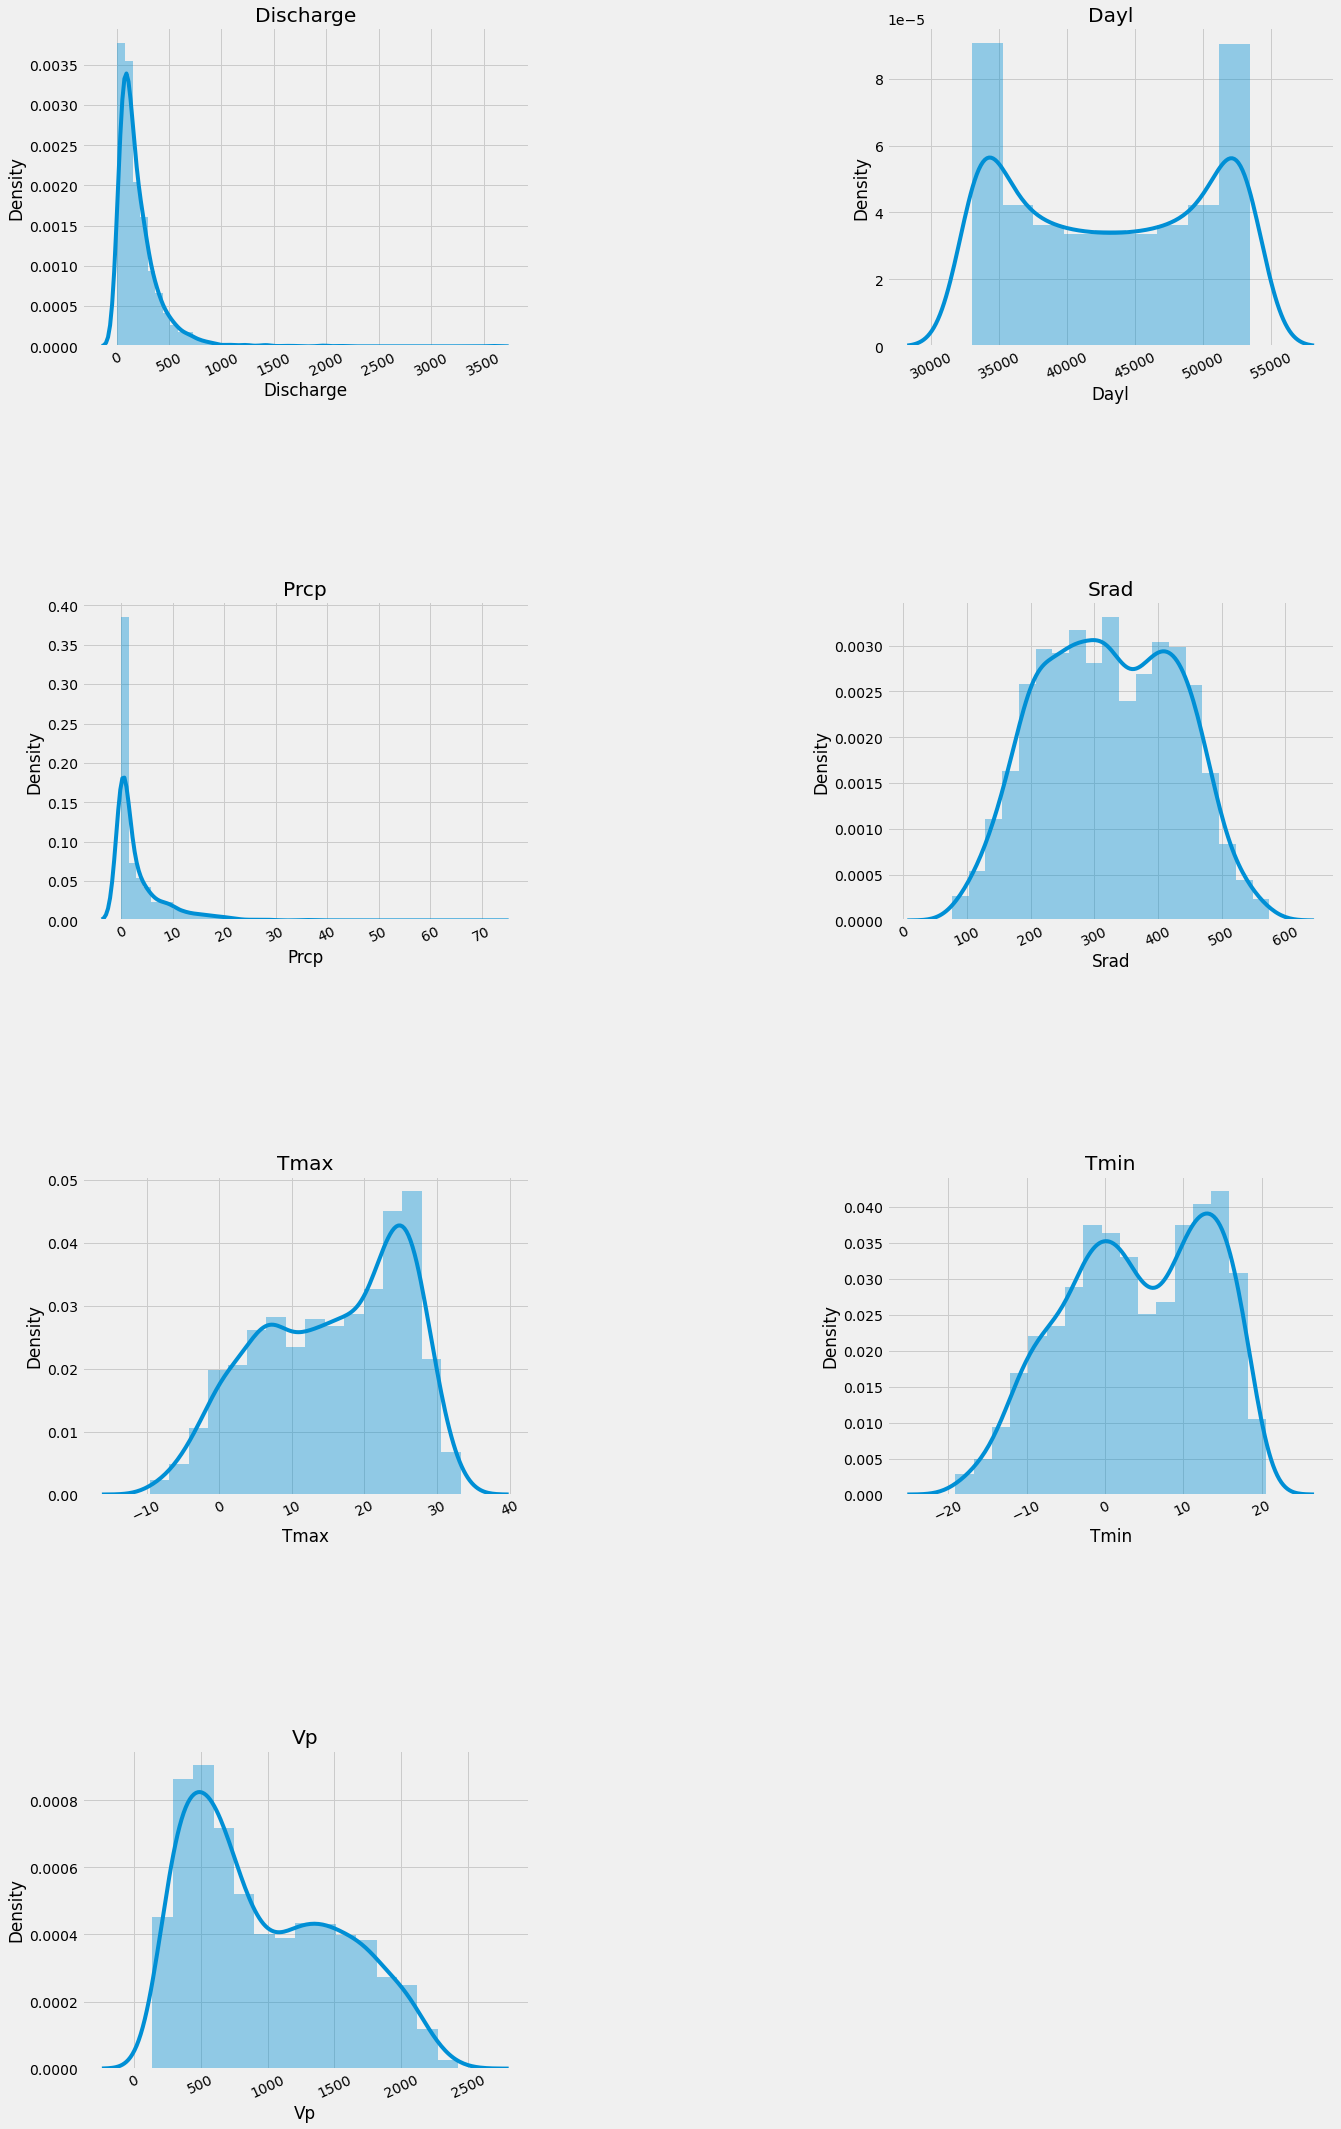

In [16]:
#封装好的通用方法，直接查看全部特征的分布情况（同时支持数值型、非数值型）

def plot_distribution(dataset, cols=5, width=20, height=30, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight') #Use matplotlib style settings from a style specification.
    fig = plt.figure(figsize=(width,height)) #Create a new figure
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) # customizing the subplots
    rows = math.ceil(float(dataset.shape[1]) / cols)
    #print(rows)
    # iterating over the columns and then showing the data distribution in various columns
    for i, column in enumerate(dataset.columns):
        # print('befor',i,cols)
        ax = fig.add_subplot(rows, cols, i + 1)
        # print('after',i,cols)
        # print(column)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object: # plot counts of different values if the column has a datatype object
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            #print(substrings)
            g.set(yticklabels=substrings) #Set the y-tick labels with list of strings labels.
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()
        else:
            g = sns.distplot(dataset[column]) # Plotting if the datatype of the column is not object#histplot
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()
#调用
plot_distribution(train, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)

In [10]:
#增加时间的特征
import pandas as pd

# 读取数据
data = pd.read_csv("01333000.csv")

# 假设您想使用过去1到5天的数据作为特征
num_days = 7

# 构建滑动窗口特征
features = ['Prcp', 'Tmax', 'Srad','Discharge']

for i in range(1, num_days + 1):
    for feature in features:
        # 创建滞后特征列，列名格式为 <特征名>_lag_<i>
        data[f'{feature}_lag_{i}'] = data[feature].shift(i)

# 添加时间特征（例如，年份、月份、日期）
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Day'] = pd.to_datetime(data['Date']).dt.day

# 去掉包含 NaN 值的行
data.dropna(inplace=True)

# 打印数据集的前几行，以查看特征是否已成功添加
print(data.head())
# 保存处理后的数据集到新文件
output_file = "processed_data.csv"
data.to_csv(output_file, index=False)  # 将数据保存到 CSV 文件，不保存索引列

print(f"Processed data saved to '{output_file}'.")

          Date  Discharge     Dayl   Prcp    Srad  Swe  Tmax  Tmin      Vp  \
7   2000-01-08       49.0  32486.4   1.77  161.63  0.0  1.54 -6.54  374.92   
8   2000-01-09       46.0  32486.4   0.00  168.24  0.0  0.82 -6.76  369.02   
9   2000-01-10       83.0  32832.0   0.00  150.35  0.0  4.09 -2.70  503.67   
10  2000-01-11      120.0  32832.0  18.22   72.23  0.0  4.75  0.67  637.65   
11  2000-01-12       79.0  32832.0   1.19  138.55  0.0  4.07 -2.58  507.84   

    Prcp_lag_1  ...  Tmax_lag_6  Srad_lag_6  Discharge_lag_6  Prcp_lag_7  \
7         0.00  ...        6.99      214.92             39.0        0.00   
8         1.77  ...       11.65      176.35             44.0        0.00   
9         0.00  ...       11.61      143.33             77.0        2.58   
10        0.00  ...       11.80      188.99             91.0        8.58   
11       18.22  ...       -2.70      208.24             55.0       13.93   

    Tmax_lag_7  Srad_lag_7  Discharge_lag_7  Year  Month  Day  
7         

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# 划分特征和目标变量
#X = data.drop(columns=['Discharge'])
X=data.drop(columns=['Swe'])
y = data['Discharge']

# 划分数据集
train_years = 1461  # 前4年的数据
X_train, X_test = X[:train_years], X[train_years:]
y_train, y_test = y[:train_years], y[train_years:]
# 使用相关系数进行特征选择
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()

# 绘制热力图
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Features")
plt.show()

NameError: name 'data' is not defined